# M3 Question 1

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Detect the encoding of the file
with open('Data/csv-1700-1830.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Load in data
df1 = pd.read_csv("Data/csv-1700-1830.csv", encoding=encoding)
df2 = pd.read_csv("Data/csv-1831-2000.csv", encoding=encoding)
df3 = pd.read_csv("Data/csv-2001-2131.csv", encoding=encoding)

# Combine into one df
df = pd.concat([df1, df2, df3]) 

# Save combined data
df.to_csv('Data/combined_raw.csv', index=False)

In [3]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date(yyyyMMddHHmmss)'], format='%Y%m%d%H%M%S')
df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date
0,mbdata,20140123170000,POK,Follow us @POK-Kronos,NaN,NaN,NaN,2014-01-23 17:00:00
1,mbdata,20140123170000,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,2014-01-23 17:00:00
2,mbdata,20140123170000,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,2014-01-23 17:00:00
3,mbdata,20140123170000,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,2014-01-23 17:00:00
4,mbdata,20140123170000,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,2014-01-23 17:00:00


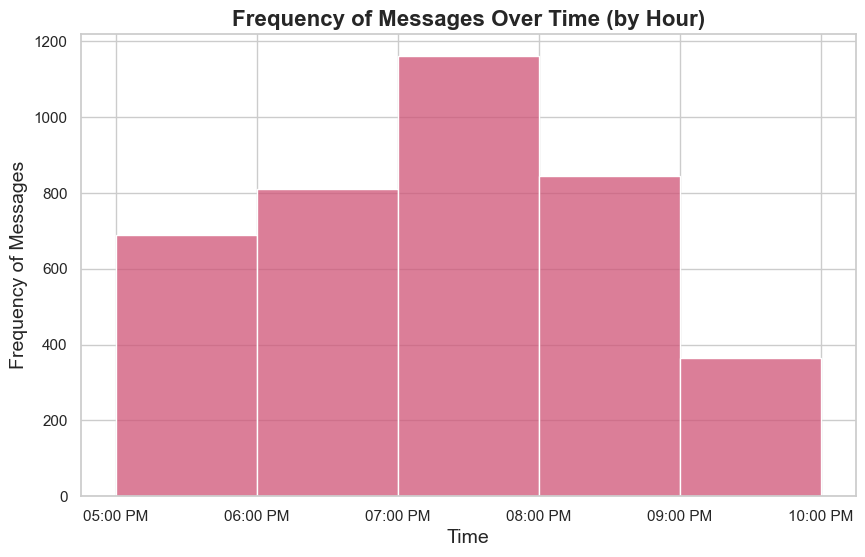

In [4]:
# Frequency of messages over time (mbdata) 
# Group by hour
df['hour'] = df['date'].dt.hour 

# Create histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='h')
sns.histplot(df[df['type'] == 'mbdata']['hour'], bins=bin_edges.hour, color='#CF5376', kde=False)

# Labels & title
plt.title('Frequency of Messages Over Time (by Hour)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Messages', fontsize=14)
formatted_ticks = [tick.strftime('%I:%M %p') for tick in bin_edges]
plt.xticks([17, 18, 19, 20, 21, 22], formatted_ticks)
plt.grid(True)
plt.show()

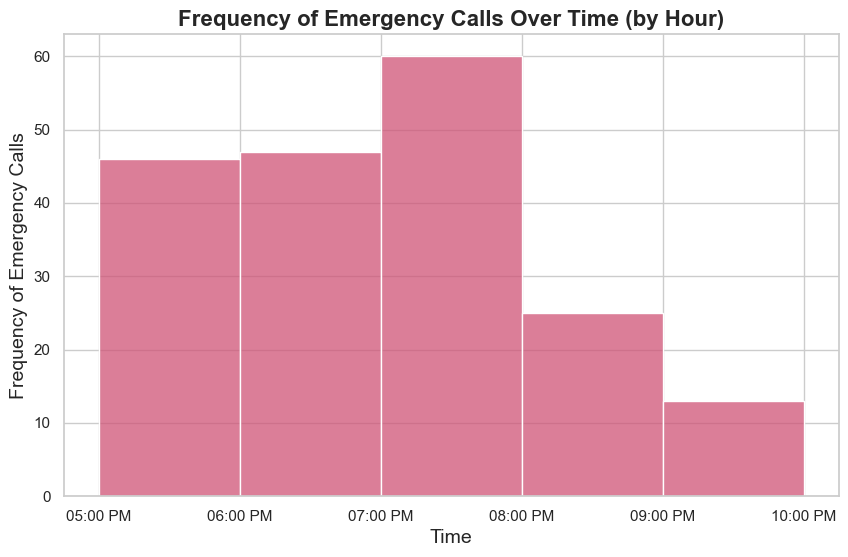

In [5]:
# Frequency of calls over time (ccdata) 

# Create histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='h')
sns.histplot(df[df['type'] == 'ccdata']['hour'], bins=bin_edges.hour, color='#CF5376', kde=False)

# Labels & title
plt.title('Frequency of Emergency Calls Over Time (by Hour)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Emergency Calls', fontsize=14)
formatted_ticks = [tick.strftime('%I:%M %p') for tick in bin_edges]
plt.xticks([17, 18, 19, 20, 21, 22], formatted_ticks)
plt.grid(True)
plt.show()

As seen in the two histograms above, the most messages (mbdata) and emergency calls (ccdata) occur between 7-8PM. This could point to the height of the incident occuring around this time. 

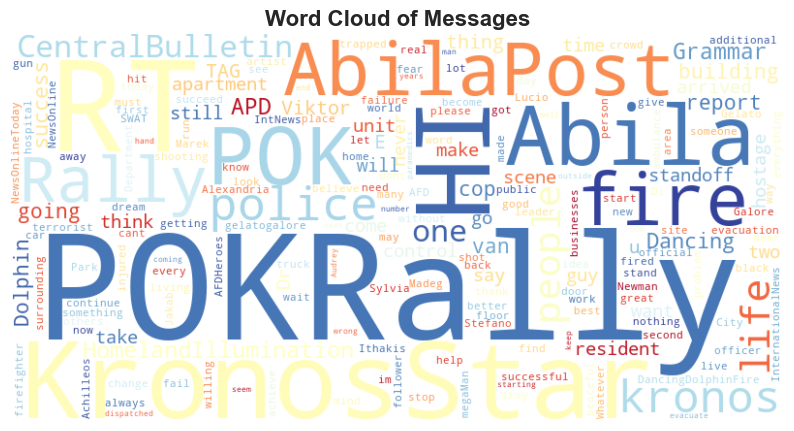

In [6]:
# Overall word cloud from mbdata
# Combine all messages into one string
all_mbdata = " ".join(df[df['type'] == 'mbdata']['message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlBu_r', collocations=False).generate(all_mbdata)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Messages', fontsize=16, weight='bold')
plt.show()

Potentially important words: POKRally, HomelandIlluminations, KronosStar, Abila, AbilaPost

### Exploring MBData

In [7]:
# Inspecting the mbdata
mb_df = df[df['type'] == 'mbdata']
len(mb_df)
mb_df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date,hour
0,mbdata,20140123170000,POK,Follow us @POK-Kronos,NaN,NaN,NaN,2014-01-23 17:00:00,17
1,mbdata,20140123170000,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,2014-01-23 17:00:00,17
2,mbdata,20140123170000,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,2014-01-23 17:00:00,17
3,mbdata,20140123170000,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,2014-01-23 17:00:00,17
4,mbdata,20140123170000,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,2014-01-23 17:00:00,17


3872 total messages.

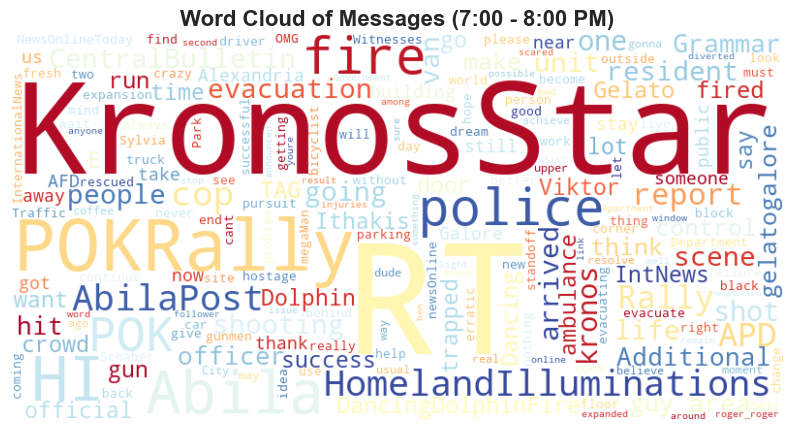

In [8]:
# Word cloud from 7-8pm
# Combine all messages into one string
all_mbdata = " ".join(mb_df[mb_df['hour'] == 19]['message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdYlBu_r', collocations=False).generate(all_mbdata)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Messages (7:00 - 8:00 PM)', fontsize=16, weight='bold')
plt.show()

Looks similar to the overall word cloud, but police shows up a bit more, which could indicate an increased police prescence during this time.

In [9]:
# Total number of authors
print("Total Authors: " + str(mb_df['author'].nunique()))

Total Authors: 154


In [10]:
# Authors usernames
mb_df['author'].unique()

array(['POK', 'maha_Homeland', 'Viktor-E', 'KronosStar', 'AbilaPost',
       'ourcountryourrights', 'ReggieWassali', 'MindOfKronos',
       'FriendsOfKronos', 'rockinHW', 'KronosQuoth', 'Clevvah4Evah',
       'rrWine', 'pinky', 'BlueVelvet', 'dragonRider1', 'blueSunshine',
       'dtennent', 'klingon4real', 'CentralBulletin', 'choconibbs',
       'sarajane', 'wiseWords', 'phantomagate', 'teresaJ', 'microBanana',
       'siliconKing', 'vetsRock', 'wireHead1122', 'mainman447',
       'grassGreeener', 'dealsRUs101', 'luvMyPants', 'brain448',
       'powercrystals', 'InternationalNews', 'anaregents', 'truccotrucco',
       'michelleR', 'junkman995', 'reggierockin776', 'rnbwBrite',
       'skinnyJeans', 'dolls4sale', 'plasticParts', 'SaveOurWildlands',
       'Officia1AbilaPost', 'footfingers', 'truthforcadau', 'soup4u',
       'muppiesRock', 'gardener4958', 'sithLordJames', 'lindyT',
       'lordWally', 'GreyCatCollectibles', 'slamrjamr', 'stolkfair',
       'worldWatcher', 'hempRules', 'z

Author names can tell us about whether the posts will most likely be spam, normal chatter, or real news reports. 

Some examples:

News: KronosStar, AbilaPost, FriendsOfKronos, CentralBulletin, InternationalNews, AbilaFireDept (usernames that point to an official entity)

Normal Chatter: eliza003, joyce101 (usernames that seem just like normal names)

Spam: trollingsnark, junkman995, dealz4realz (usernames that seem to be advertising for something or are blatantly for spam accounts)

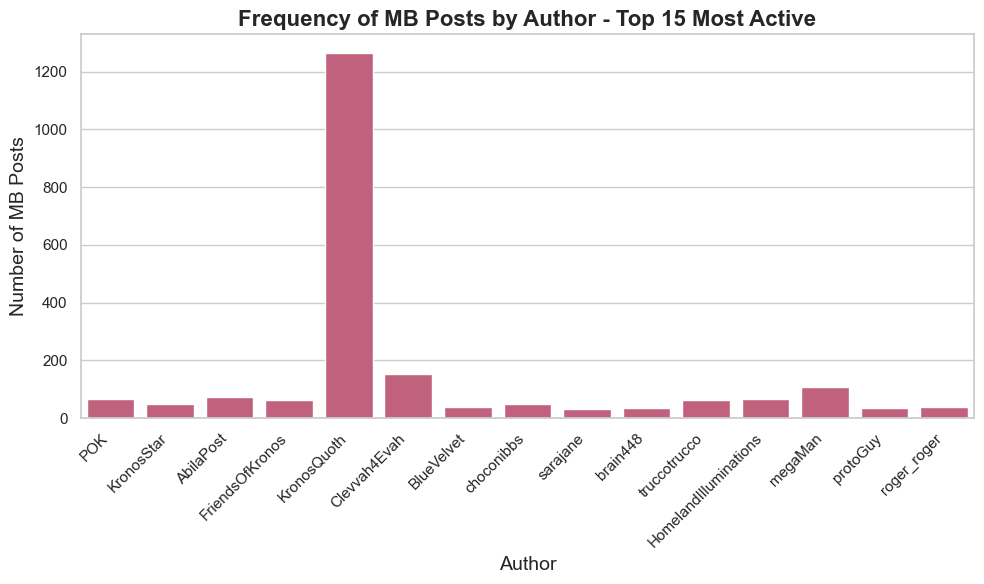

In [11]:
# Authors and message frequency

# Plot top 15 most active authors
top_authors = mb_df['author'].value_counts().nlargest(15).index
mb_data_top_authors = mb_df[mb_df['author'].isin(top_authors)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=mb_data_top_authors, x='author', color='#CF5376')  

# Labels & title
plt.title('Frequency of MB Posts by Author - Top 15 Most Active', fontsize=16, weight='bold')
plt.xlabel('Author', fontsize=14)
plt.ylabel('Number of MB Posts', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

This doesn't tell us a ton about the division of types of mb data, but it shows that KronosQuoth is very active in comparison to all the other authors.

### Exploring CCData

In [12]:
# Inspecting the ccdata
cc_df = df[df['type'] == 'ccdata']
len(cc_df)

# Clean up location data
cc_df = cc_df.rename(columns={' location': 'location'})
cc_df['location'] = cc_df['location'].str.strip()  # Remove leading/trailing spaces

cc_df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date,hour
9,ccdata,20140123170000,NaN,KEEP THE PEACE-CROWD CONTROL/ABILA CITY PARK,NaN,NaN,Egeou St / Parla St,2014-01-23 17:00:00,17
28,ccdata,20140123170210,NaN,TRAFFIC STOP,NaN,NaN,N. Els St / N. Polvo St,2014-01-23 17:02:10,17
59,ccdata,20140123170513,NaN,PARK CHECK,NaN,NaN,2099 Sannan Pky,2014-01-23 17:05:13,17
123,ccdata,20140123171102,NaN,DISTURBANCE-NOISE,NaN,NaN,3654 N. Barwyn St,2014-01-23 17:11:02,17
131,ccdata,20140123171153,NaN,ALARM-SECURE NO CRIME,NaN,NaN,3815 N. Blant St,2014-01-23 17:11:53,17


191 total emergency calls.

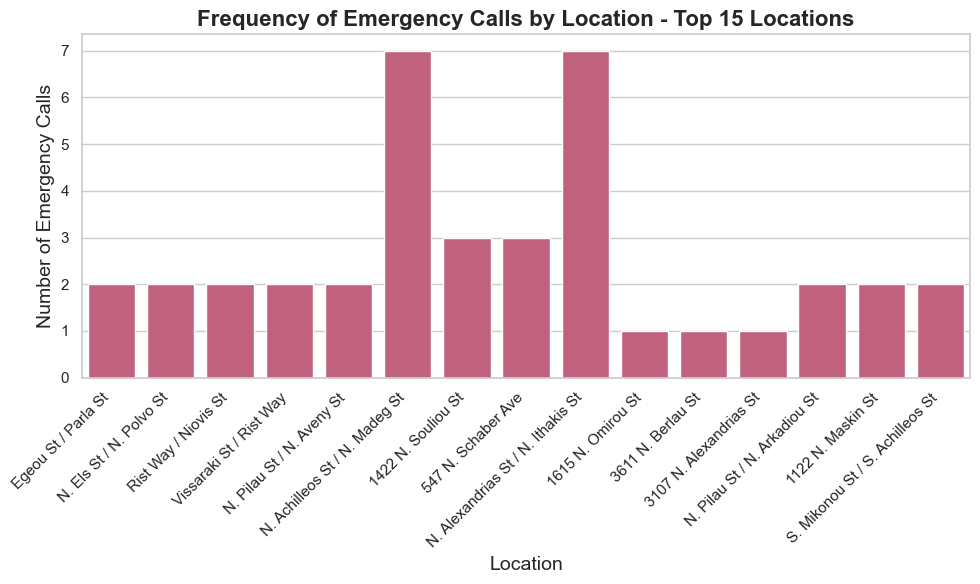

In [13]:
# Emergency calls by location
# Drop nulls for this 
cc_no_nulls = cc_df.dropna(subset=['location'])  # Drop rows where location is null
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))



# Get the top 15 locations by frequency of ccdata entries
top_locations = cc_no_nulls['location'].value_counts().nlargest(15).index
ccdata_top_locations = cc_no_nulls[cc_no_nulls['location'].isin(top_locations)]
sns.countplot(data=ccdata_top_locations, x='location', color='#CF5376')

# Labels & title
plt.title('Frequency of Emergency Calls by Location - Top 15 Locations', fontsize=16, weight='bold')
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Emergency Calls', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The locations with the highest number of emergency calls may be the location(s) at which the event occurred.

N. Achilleos St / N. Madeg St and N. Alexandrias St / N. Ithakis St have the most calls (7).

In [14]:
# Save cleaned dataset with new date column
df.to_csv('Data/combined_clean.csv', index=False)

### Identifying "Typical Chatter"

In [15]:
spam_authors = {'deals4realz', 'dealsRUs101', 'dirtdigger334', 'eazymoney',
                'junkman377', 'junkman995', 'maskedWoman101', 'megaMan',
                'whiteprotein'}

event_authors = {'AbilaFireDept', 'AbilaPoliceDepartment', 'AbilaPost',
                 'CentralBulletin', 'HomelandIlluminations', 'InternationalNews', 'KronosStar',
                 'NewsOnlineToday', 'OnlytheTruth'}

all_authors = set(df['author'].dropna().unique())

# Compute typical chatter authors
typical_authors = sorted(list(all_authors - spam_authors - event_authors))
typical_authors

['AbilaAllFaith',
 'BlueVelvet',
 'BoraVerissimo',
 'Clevvah4Evah',
 'FriendsOfKronos',
 'GreyCatCollectibles',
 'HerraTomas',
 'KronosQuoth',
 'MarcusDrymiau',
 'MindOfKronos',
 'Officia1AbilaPost',
 'POK',
 'ReggieWassali',
 'Sara_Nespola',
 'SaveOurWildlands',
 'SiaradSea',
 'Simon_Hamaeth',
 'Viktor-E',
 'aaasTech',
 'aliceRocks',
 'anaregents',
 'blueSunshine',
 'brain448',
 'brandonL',
 'brewvebeenserved',
 'brontes_riff',
 'carjunkers',
 'cheapgoods998',
 'choconibbs',
 'cleaningFish',
 'cminvestments11',
 'courage4life',
 'creatorRocks',
 'dangermice',
 'dolls4sale',
 'dragonRider1',
 'dtennent',
 'dtrejos',
 'electricAvenue',
 'eliza003',
 'ernieO',
 'farmboy',
 'fictionalJoe',
 'footfingers',
 'gardener4958',
 'grassGreeener',
 'grlPwrz505',
 'hazMore445',
 'hempRules',
 'hennyhenhendrix',
 'henri',
 'hermanM',
 'hngohebo_ABILAPOST',
 'hotdrugs225',
 'jaques',
 'jenny90210',
 'jgrobannne',
 'joyBubbles',
 'joyce101',
 'joyousNoise',
 'jsmith',
 'junk99902',
 'junkieduck113',
